# Multiomics modeling

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`task1_multiomics_ghaemi2019multiomics.pdf`).
The idea is to use biological measurements to characterize biological changes during pregnancy.
The authors use multiple modalities (measurements collected from the immune system, microbiome, etc.)
This includes whether we can predict the gestational age of a mother solely based on the collected biomarkers.

**Note**: There is no need to get acquainted with multiomics modeling, at least for this exercise. In the end, this is just a regular data science task :) 

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details pleaase see the paper.

In [3]:
# code for loading the data

import numpy as np
import pickle

with open("task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)
    
data_multiomics.head(5)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [4]:
# look at the immune system
data_multiomics["immune_system"].head(5)

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


## Tasks

### Your experience

Before we start, please briefly describe your experience in data science and machine learning (5 sentences).

For my Master's degree in Mathematical Sciences at the African Institute for Mathematical Sciences (AIMS) in Cape Town, South Africa, where I focused on image segmentation using a combination of the Level Set model and deep learning methods. I also conducted a Master's thesis at the National Advanced School of Engineering (ENSPY) in Yaounde, Cameroon, comparing the use of time series ARIMA models and machine learning methods for economic data forecasting.

I have been recognized for my achievements and received several awards, including the Bending Spoons Scholarship for being the best Masters student in the field of AI. I have also attended seminars, talks, workshops, and summer schools like Neuromatch Academy School to further enhance my knowledge in deep learning, computer vision, and other related topics.

Overall, my technical skills include programming languages such as Python, R, Stata, C, SQL and SAGEMATH. I am proficient in frameworks like Django and Flutter, and I have experience with operating systems like Windows, Linux, and Mac OS
In addition to my technical skills, I have personal skills such as effective communication, collaboration, public speaking, creativity, and integrity. I am a member of organizations like Black in AI and the Cape Town Coding Club, where I actively contribute to the field of AI and participate in knowledge sharing and mentorship activities.

In conclusion, my experience in data science and machine learning encompasses a diverse range of skills and knowledge, allowing me to contribute effectively to projects and research in these fields.


### Gestational Age

1. **Predict `gestational_age`** using the `immune_system` modality using at least two models (e.g., elastic net and support vector machines)

2. **Evaluate** your models using a measure that you think fits best. If it is a different measure than in the paper, please briefly explain why.

3. For your best model, **plot the model predictions** similar to **Figure 2D**.


**Hint:** To train and evaluate models, you can use [scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).

**Figure 2D:**<br/>
<img src="assets/task1_multiomics_fig2d.jpeg">

## Answers

><font color='green'>Fot this problem I consider using `gestational_age` as a `continuous variable` (rather than `discrete`). For this reason I will use regression class models to predict the age. Specifically I opt to use `Elastic Net` and `Xgboost` models.</font>
>1. <font color='green'> Elastic net `(`EN`)` assumes statistical independence between all variables. In the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019**, It's mentioned that samples collected from thesame subject at different trimesters are not. To account for this I consider using `cross validation` `(`K-fold CV`)`. The cross validation is performed such that, at each iteration, I have one subject set aside for validation, and the remaining subjects are used for training. With this configuration I have exactly $52/4= 13 folds$ </font>
>2. <font color='green'> A random splitting (and shuffling) will be inefficient because we may have the same subject in the train and validation set. To avoid this we perform a kind of "batch" splitting, which maintain the trimester of a subject in either the train or test dataset. Our test dataset here will be the remaining $12$ samples (which is actually $3$ subjects)  </font>
>3. <font color='green'>The implementation reveals that the `xgboost` regressor perform better that the `EN` model  with  a `mean square error` of roughly `84.60` (`EN` gives `~128.83`)</font>
>4. <font color='green'> I opt to use mean square error because of the distribution of the target variable (`gestational_age`) which is continuous. From my knowledge variables like `age samples` of a population follow a normal distribution and their patterns can be captured using linear class of functions.</font>

In [5]:
import random
random.seed(42)

In [6]:
## install necessary librairy for the xgboost method

! pip install xgboost

In [7]:
### We start by importing necessary librairies 
import numpy as np
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.metrics import mean_squared_error,classification_report
import matplotlib.pyplot as plt

In [8]:
def model_pipe_line(X,y,random_state,model_name,plot=False):

    """
    Input
    ----- X:                   train data  (numpy array)
          y:                   train label (numpy array)
          random_state:        state of the model (float)
          model_name:          model type (string) (put either 'elastic' or 'xgboost' by default is 'elastic')
          plot :               plots (if set to True) the model's prediction (default is False)
    """

    ## we normalize the string by setting it to lower case letters
    string = model_name.lower()
    average_loss=[]
    if string=='elastic':
        ## if 'elastic' then load the elastic net regressor
         model= ElasticNet(random_state=random_state)

    elif string=='xgboost':
        ## if 'xgboost' then load the xgboost regressor model
        model= xgb.XGBRegressor(random_state=random_state)
    else:
        ## else go to default setting which is just elastic net
        model= ElasticNet(random_state=random_state)


    ## let's perform K-fold cross validation now.
    ## we will use 80% of data for training and the remaining 20% for validation

    for idx in range(0,len(y)-12,4):

        ### select the train indices and validation indices
        val_indices= np.array(range(idx,idx+4))
        train_indices = np.array([i for i in range(len(y)) if i not in val_indices])

        ### fit the given model
        model.fit(X=X[train_indices, :], y=y[train_indices])

        ### perform the predictions

        y_predict= model.predict(X[val_indices,:]) # validation

        ## we now compute the error score using the mean-square error (MSE)
        
        error= mean_squared_error(y[val_indices],y_predict)

        average_loss.append(error)
        # print('mean square error for fold {} is {}'.format(idx//4,error))

    print("average error is: {} ".format(np.mean(average_loss)))
    
    test_indices= np.array(range(len(y)-12,len(y))) #testing
    
    y_predict= model.predict(X[test_indices,:])
    if plot:
 
        plt.figure(figsize=(9,5))
        plt.scatter(y[test_indices],y_predict)
        plt.ylabel('Prediction')
        plt.xlabel('Gestational Age')
        plt.title("Trajectory Analysis")

In [9]:
train=data_multiomics["immune_system"].values
y=  data_multiomics.gestational_age.values

average error is: 84.6014187639548 


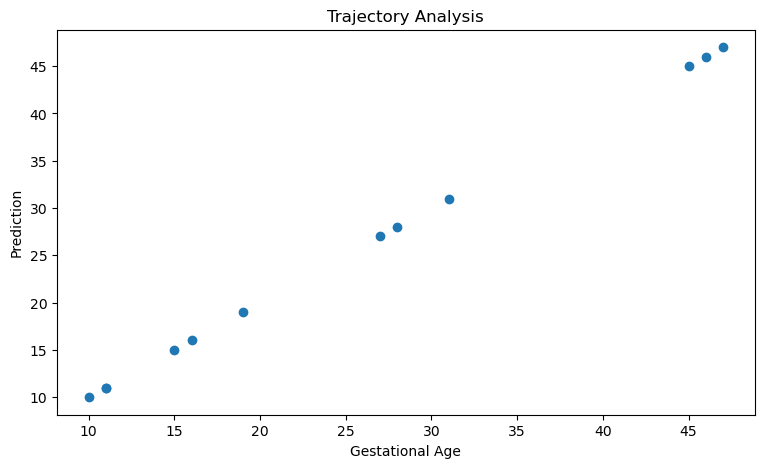

In [10]:
## when using the model just define the instance of the function model_pipe_line with the desire name of the funtion

## Let doing the prediction using the XGboost model 
model_pipe_line(X=train,y=y,random_state=42,model_name='xgboost',plot=True)

In [11]:
## Let doing the prediction using the ElasticNet model 
model_pipe_line(X=train,y=y,random_state=42,model_name='elastic',plot=False)

average error is: 128.83571166187565 


### Sex of the baby

1. Try using a neural network in Tensorflow or PyTorch to predict the sex of the baby. 
2. Try to optimize the network the best you can (don't spend too much time on this though).

## Answers

>1. <font color='green'> Here we still use the `immune_system` as the modality to predict the `sex of the baby`. Having a close look at the variable `sex_bin` we notice that, it's an encoded version of the `sex of the baby` variable. We will therefore work with `sex_bin`. This is a `binary classification` problem as we only have `2 classes` (Male and Female).</font>
>2. <font color='green'> Using `torch`, I build a `3 layers` neural network, which include 2 `relu` activation function as well as batch normalization.</font>
>3. <font color='green'>I also use a dropout probability of $10\%$ to improve the performance of our model. The hyper-parameters design here are the `BATCH SIZE`, the number of `EPOCHS` and the `learning rate`. Notice how the `BATCH SIZE`  is very small with a size of $4$. This is to ensure that we take a batch of the same subject during the training stage. I also ensured not to `shuffle` the data during when designing the `training loader`.</font>
>4. <font color='green'>I used the `classification report` to display the `accuracy` and `F1 score` of our model. The accuracy is roughly `75%` </font>
>5. <font color='green'> The `binary cross entropy` was used as a suitable criterion for our algorithm </font>


In [22]:
## Importing necessary libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader 

In [23]:
## some sanity check about the 'sex_bin' variable 
# 1. I check if it has two class (which is the case)
np.unique(data_multiomics.sex_bin.values)

## 2. I also check if a variable in the `sex` column , matches the `sex_bin` column
print("Number of count of males is {} and Number of count of females is {} ".format(len(data_multiomics[data_multiomics['sex_bin']==1]), len(data_multiomics[data_multiomics['sex_bin']==0])))

Number of count of males is 32 and Number of count of females is 36 


In [24]:
### loading the data
y= data_multiomics.sex_bin.values
data=data_multiomics['immune_system'].values

In [25]:
## we take the first 52 data points for training and the remaining 12 for testing
train_indices= np.array(range(len(y)-12))
test_indices= np.array([idx for idx in range(len(y)) if idx not in train_indices])

## we can now split the data into train  set and validation set

X_train,y_train,X_test,y_test= data[train_indices,:], y[train_indices], data[test_indices,:], y[test_indices]

## we define some necessary hyper-parameters
EPOCHS = 20
BATCH_SIZE = 4 ### because each subject has 3 trimesters plus a prostartum
LEARNING_RATE = 0.001

## creating the data loaders

## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [26]:
## we now initialize both data loaders
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [27]:
## we define our binary classification,neural network model
## note that the input of our classifier is equal to the number of features available
## we also use batchnormalization 
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(X_train.shape[1], 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [28]:
### allocating a specific device for training (either cpu or gpu (cuda))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
### setting up our model
model = BinaryClassification()
model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [29]:
### Model evaluation using accuracy
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [30]:
## model training
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  #Batch gradient descend
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1)) 
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')


Epoch 001: | Loss: 0.74683 | Acc: 46.429
Epoch 002: | Loss: 0.70717 | Acc: 57.143
Epoch 003: | Loss: 0.68821 | Acc: 50.000
Epoch 004: | Loss: 0.69028 | Acc: 53.571
Epoch 005: | Loss: 0.69771 | Acc: 55.357
Epoch 006: | Loss: 0.69837 | Acc: 53.571
Epoch 007: | Loss: 0.67700 | Acc: 58.929
Epoch 008: | Loss: 0.70042 | Acc: 42.857
Epoch 009: | Loss: 0.69409 | Acc: 50.000
Epoch 010: | Loss: 0.68680 | Acc: 55.357
Epoch 011: | Loss: 0.68381 | Acc: 58.929
Epoch 012: | Loss: 0.69693 | Acc: 51.786
Epoch 013: | Loss: 0.68433 | Acc: 51.786
Epoch 014: | Loss: 0.68513 | Acc: 53.571
Epoch 015: | Loss: 0.69117 | Acc: 53.571
Epoch 016: | Loss: 0.68252 | Acc: 55.357
Epoch 017: | Loss: 0.68613 | Acc: 57.143
Epoch 018: | Loss: 0.67793 | Acc: 57.143
Epoch 019: | Loss: 0.68691 | Acc: 53.571
Epoch 020: | Loss: 0.68745 | Acc: 60.714


In [31]:
#### evaluation mode of our model
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.86      0.75      0.80         8

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



### Feedback

Were the tasks above difficult, easy, or a mixture? In both cases, briefly describe why.

Yes this exercice was difficult especially the first question where we are try to predict the Predict gestational_age using the immune_system.

My principal challenge was to understand and solve the problem of multiple index during the splitting of the Dataset. Indeed, by using the simple split to split the dataset, I got an error or issue with the multiple index in the data. 

I the second question, my challenge was to understand clairly the spirit of the question, our to define the problem. 